In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_boston
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression

# Multiple linear regression

$\text{estimated monthly income} = slope * seniority + intercept $

$\text{estimated monthly income} = slope\_s * seniority + slope\_ed * years\_of\_education  + intercept $

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

**Using statsmodels**

`formula = "mpg ~ acceleration+weight+orig_1+orig_2+orig_3"
model = ols(formula= formula, data=data_ols).fit()`

`outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum`

`model = ols(formula= formula, data=data_ols).fit()
model.summary()`

**Using scikit learn**  
Comparison: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/

`y = data_ols['mpg']
linreg = LinearRegression()
linreg.fit(predictors, y)`

# Transform categorical variables

## Label encoding

In [5]:
origin = ["USA", "EU", "EU", "ASIA","USA", "EU", "EU", "ASIA", "ASIA", "USA"]
origin_series = pd.Series(origin)
cat_origin = origin_series.astype('category')
cat_origin.cat.codes # only when .astype('category')

# with sklearn
lb_make = LabelEncoder()
origin_encoded = lb_make.fit_transform(cat_origin)

## Dummy variables / one-hot-encoding

In [17]:
pd.get_dummies(cat_origin)

# with sklearn
lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# you need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)

## Binning

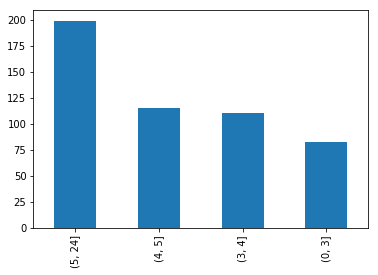

In [31]:
boston = load_boston()
boston_features = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target, columns=['MEDV'])
boston_df = pd.concat([boston_features, boston_target], axis=1)

boston_df["RAD"].describe()

# create bins based on Q, .cut -> unordered categories
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_df['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

bins_rad.value_counts().plot(kind='bar')

# Multicollinearity

- Identify
  - Scatter matrix `pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9])`
  - Correlation matrix `data_pred.corr()` `abs(data_pred.corr()) > 0.75`
  - Seaborn heatmap `sns.heatmap(data_pred.corr(), center=0)`

# Feature scaling and normalization

- **Log transformation** Reduce skewness / variability. When data doesn't follow a normal distribution
- **Min-max scaling** Scale values between 0 and 1 $$x' = \dfrac{x-\min(x)}{\max(x)-\min(x)}$$
- **Standarization** $\mu=0$, $\sigma=1$ $$x' = \dfrac{x - \bar x}{\sigma}$$
- **Mean normalization** Values between -1 and 1, mean 0$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$
- **Unit vector transformation** x' with a range [0,1] $$x'= \dfrac{x}{{||x||}}$$ Recall $$||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$$

- Log transformation `np.log(df.col)`
- Standarization `(logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))`
- Mean normalization `(loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))`

`MinMaxScaler`, `StandardScaler` and `Normalizer`
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!